In [1]:
url = 'https://www.worldometers.info/coronavirus/'

In [2]:
import requests

In [3]:
content = requests.get(url).content

In [4]:
from bs4 import BeautifulSoup # https://pypi.org/project/beautifulsoup4/

In [5]:
soup = BeautifulSoup(content, 'html.parser')

In [6]:
soup


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon

In [7]:
soup.find("tbody") # html page ko table format check garn

<tbody>
<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>125,378,119</td>
<td></td>
<td>1,618,184</td>
<td></td>
<td>120,814,438</td>
<td>+1,530</td>
<td>2,945,497</td>
<td>7,413</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<!-- 1 Case every X -->
<td>
</td>
<!-- 1 Death every X -->
<td></td>
<!-- 1 test every X -->
<td></td>
<td></td>
<td></td>
<td></td>
</tr>
<tr class="total_row_world row_continent" data-continent="Asia" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>Asia</nobr>
</td>
<td>214,944,822</td>
<td>+4,030</td>
<td>1,539,411</td>
<td>+9</td>
<td>199,533,774</td>
<td></td>
<td>13,871,637</td>
<td>15,520</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="Asia" style="display:none;">Asia</td>
<!-- 1 Case every X -->
<td>
</t

In [8]:
tbody = soup.find('tbody')

In [9]:
table_row = tbody.find_all('tr')

In [10]:
table_row[0]

<tr class="total_row_world row_continent" data-continent="North America" style="display: none">
<td></td>
<td style="text-align:left;">
<nobr>North America</nobr>
</td>
<td>125,378,119</td>
<td></td>
<td>1,618,184</td>
<td></td>
<td>120,814,438</td>
<td>+1,530</td>
<td>2,945,497</td>
<td>7,413</td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td data-continent="North America" style="display:none;">North America</td>
<!-- 1 Case every X -->
<td>
</td>
<!-- 1 Death every X -->
<td></td>
<!-- 1 test every X -->
<td></td>
<td></td>
<td></td>
<td></td>
</tr>

In [11]:
for i in range(8, len(table_row)):
    country_data_row = table_row[i].find_all('td')
    for tag in country_data_row:
        print(tag.text)

1
USA
105,972,038

1,151,642                                

103,587,178

1,233,218
2,247
316,518
3,440
1,171,196,261
3,498,142
334,805,269 
North America
3
291
0


3,683
2
India
44,695,420

530,802                                

44,158,703

5,915
N/A
31,775
377
920,111,661
654,124
1,406,631,776 
Asia
31
2,650
2


4
3
France
39,703,279

165,314                                

39,451,266

86,699
869
605,376
2,521
271,490,188
4,139,547
65,584,518 
Europe
2
397
0


1,322
4
Germany
38,297,037

169,661                                

37,936,100

191,276
N/A
456,550
2,023
122,332,384
1,458,359
83,883,596 
Europe
2
494
1


2,280
5
Brazil
37,145,514

699,634                                

36,249,161

196,719
N/A
172,486
3,249
63,776,166
296,146
215,353,593 
South America
6
308
3


913
6
Japan
33,374,303

73,511                                

21,709,584

11,591,208
80
265,751
585
96,800,542
770,798
125,584,838 
Asia
4
1,708
1


92,298
7
S. Korea
30,702,960
+3,930
34,171                

In [12]:
all_country_data = []
for i in range(8, len(table_row)):
    country = []
    country_data_row = table_row[i].find_all('td')
    for tag in country_data_row:
        country.append(tag.text)
    
    all_country_data.append(country)

In [13]:
all_country_data[0][1:7] # 7-country ko matra aune

['USA',
 '105,972,038',
 '',
 '1,151,642                                ',
 '',
 '103,587,178']

In [14]:
data = list(map(lambda x: x[1:7], all_country_data)) # lambda le sorting garn help garne

In [15]:
data

[['USA',
  '105,972,038',
  '',
  '1,151,642                                ',
  '',
  '103,587,178'],
 ['India',
  '44,695,420',
  '',
  '530,802                                ',
  '',
  '44,158,703'],
 ['France',
  '39,703,279',
  '',
  '165,314                                ',
  '',
  '39,451,266'],
 ['Germany',
  '38,297,037',
  '',
  '169,661                                ',
  '',
  '37,936,100'],
 ['Brazil',
  '37,145,514',
  '',
  '699,634                                ',
  '',
  '36,249,161'],
 ['Japan',
  '33,374,303',
  '',
  '73,511                                ',
  '',
  '21,709,584'],
 ['S. Korea',
  '30,702,960',
  '+3,930',
  '34,171                                ',
  '+9',
  '30,499,411'],
 ['Italy',
  '25,651,205',
  '',
  '188,750                                ',
  '',
  '25,320,467'],
 ['UK',
  '24,423,396',
  '',
  '208,458                                ',
  '',
  '24,158,042'],
 ['Russia',
  '22,506,199',
  '',
  '396,834                                ',


In [16]:
import pandas as pd

In [17]:
df = pd.DataFrame(data)

In [18]:
df.head()

,0,1,2,3,4,5
0,USA,"105,972,038",,"1,151,642",,"103,587,178"
1,India,"44,695,420",,"530,802",,"44,158,703"
2,France,"39,703,279",,"165,314",,"39,451,266"
3,Germany,"38,297,037",,"169,661",,"37,936,100"
4,Brazil,"37,145,514",,"699,634",,"36,249,161"


In [19]:
type(df)

pandas.core.frame.DataFrame

In [21]:
columns = ['Country',
          'Total Cases',
          'New Cases',
          'Total death',
          'New Death',
          'Total Recovered']

In [23]:
df.columns = columns

In [24]:
df.head()

,Country,Total Cases,New Cases,Total death,New Death,Total Recovered
0,USA,"105,972,038",,"1,151,642",,"103,587,178"
1,India,"44,695,420",,"530,802",,"44,158,703"
2,France,"39,703,279",,"165,314",,"39,451,266"
3,Germany,"38,297,037",,"169,661",,"37,936,100"
4,Brazil,"37,145,514",,"699,634",,"36,249,161"


In [25]:
df.to_csv('covid-mar-20.csv', index = False) # converting dataframe to csv file (comma seperated value) export gareko

In [26]:
df = pd.read_csv('covid-mar-20.csv') #read csv file in dataframe

In [27]:
df.head(2) # starting bat data taneko

,Country,Total Cases,New Cases,Total death,New Death,Total Recovered
0,USA,"105,972,038",NaN,"1,151,642",NaN,"103,587,178"
1,India,"44,695,420",NaN,"530,802",NaN,"44,158,703"


In [28]:
df.tail(2) #data last bat read gareko (NaN is missing data type)

,Country,Total Cases,New Cases,Total death,New Death,Total Recovered
229,Tokelau,5,NaN,,NaN,NaN
230,China,"503,302",NaN,"5,272",NaN,"379,053"


In [29]:
df.shape # 232 rows and 6 columns

(231, 6)

In [30]:
df.isna() # missing areas lai false right lai true dekhaune

,Country,Total Cases,New Cases,Total death,New Death,Total Recovered
0,False,False,True,False,True,False
1,False,False,True,False,True,False
2,False,False,True,False,True,False
3,False,False,True,False,True,False
4,False,False,True,False,True,False
...,...,...,...,...,...,...
226,False,False,True,False,True,False
227,False,False,True,False,True,False
228,False,False,True,False,True,False
229,False,False,True,False,True,True


In [ ]:
True + True

In [ ]:
True + False

In [ ]:
False + False

In [31]:
df.isna().sum() # how many missing rows in each column

Country              0
Total Cases          0
New Cases          229
Total death          0
New Death          230
Total Recovered     21
dtype: int64

<AxesSubplot:>

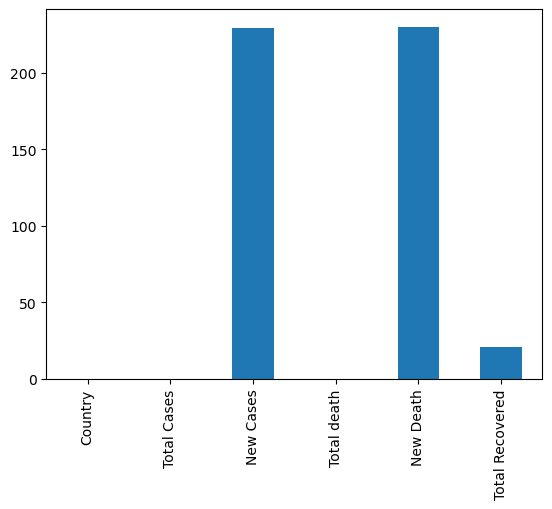

In [32]:
df.isna().sum().plot.bar() # Diagram ma dekhaune

In [33]:
import seaborn as sns

<AxesSubplot:>

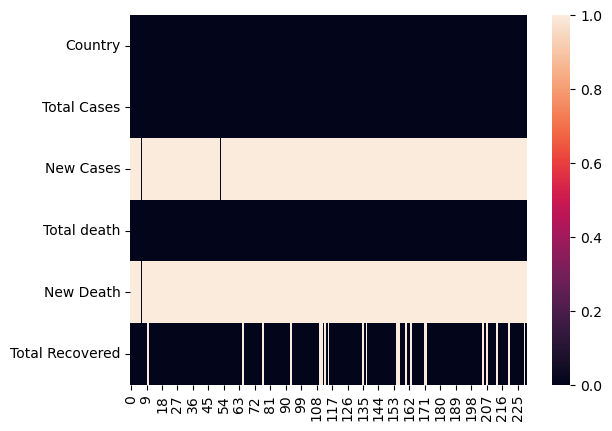

In [34]:
sns.heatmap(df.isna().transpose()) # missing area lai dark banaune

In [35]:
df.head()

,Country,Total Cases,New Cases,Total death,New Death,Total Recovered
0,USA,"105,972,038",NaN,"1,151,642",NaN,"103,587,178"
1,India,"44,695,420",NaN,"530,802",NaN,"44,158,703"
2,France,"39,703,279",NaN,"165,314",NaN,"39,451,266"
3,Germany,"38,297,037",NaN,"169,661",NaN,"37,936,100"
4,Brazil,"37,145,514",NaN,"699,634",NaN,"36,249,161"


In [36]:
df[df['Country'] == 'Nepal'] # Nepal ko matra hern

,Country,Total Cases,New Cases,Total death,New Death,Total Recovered
72,Nepal,"1,001,182",NaN,"12,020",NaN,"989,145"


In [37]:
df[df['Country'] == 'China']

,Country,Total Cases,New Cases,Total death,New Death,Total Recovered
230,China,"503,302",NaN,"5,272",NaN,"379,053"
